In [47]:
#create a k means clustering algorithms to group customers of a retail store based on their purchase history

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import warnings 
warnings.filterwarnings("ignore")

In [49]:
data=pd.read_csv("Mall_Customers.csv")

In [50]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [52]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [53]:
#there are no null values

In [54]:
data1=data.drop(["CustomerID","Gender","Age"],axis=1) #

In [55]:
# REASON FOR DROPPING CUSTOMER ID,Gender,Age
#Customer id -it is just an identity of customers and dont dont have meaning ful relationship between them so i decided to drop
#Gender-Gender a categorial data, k meand usually works on numerical data ,it works based on eucladion distance between points and age doesnt have numerical relationship 
        #even if done one hot encoding it still can affect result
#age- age is numerical but it doesnt provide significant contribution to our requirement as our analysis ,requirement is grouping customers 
       #based on customer purchasing history

In [56]:
data1

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [57]:
from sklearn.cluster import KMeans

In [58]:
kmeans = KMeans(n_clusters=3, random_state=42) # to understand works did  a test to observe how the algorithm groups the data 

In [59]:
kmeans.fit_predict(data1)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

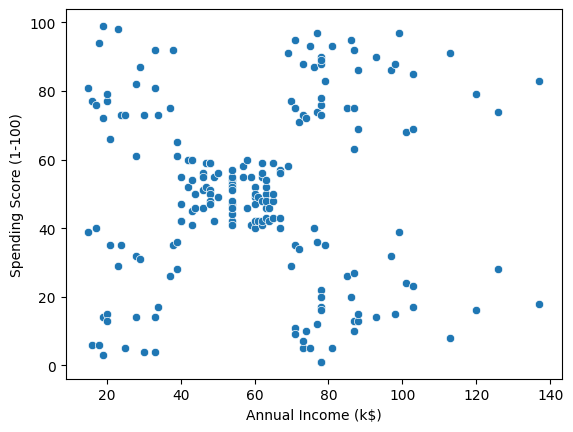

In [60]:
sns.scatterplot(data=data1,x=data["Annual Income (k$)"],y=data["Spending Score (1-100)"])
plt.show()

In [61]:
kmeans.inertia_  # sum of square distance  of samples to their closest cluster centers

106348.37306211119

In [87]:
centroids=kmeans.cluster_centers_ # we have 3 clusters with their centroids  at these coordinates

In [63]:
centroids

array([[87.        , 18.63157895],
       [86.53846154, 82.12820513],
       [44.15447154, 49.82926829]])

In [64]:
centroidsdata=pd.DataFrame(centroids,columns=["x","y"])

In [65]:
centroidsdata # the average value of two input variables  for each cluster 

,x,y
0,87.000000,18.631579
1,86.538462,82.128205
2,44.154472,49.829268


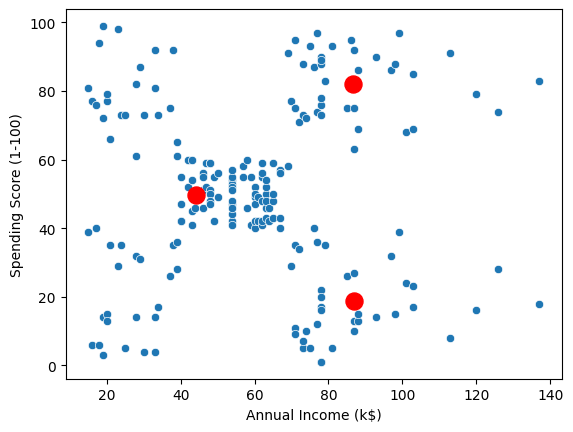

In [88]:
sns.scatterplot(data=data1,x=data["Annual Income (k$)"],y=data["Spending Score (1-100)"])
plt.scatter(centroidsdata["x"],centroidsdata["y"],c="red",s=150)
plt.show() # c -represents clusters 

In [90]:
wcss=[]
clusters=list(range(1,21))
for i in clusters:
     model=KMeans(n_clusters=i)
     model.fit(data1)
     wcss.append(model.inertia_) # to find the best cluster for analysis we can use elbow method by calculating wcss (within cluster sum of squares) 
#for different values of k

In [68]:
wcss

[269981.28,
 183653.3289473684,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37558.92202302528,
 31632.259809473475,
 29179.113615462553,
 25515.702749961572,
 19664.685196005543,
 19190.04487681436,
 16180.9471532975,
 15627.662941527073,
 14018.238613674657,
 12989.239296325337,
 11308.04613997114,
 10475.796753246754,
 11179.183383283385,
 9436.398951852243,
 8077.911027861029]

In [69]:
clusters

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

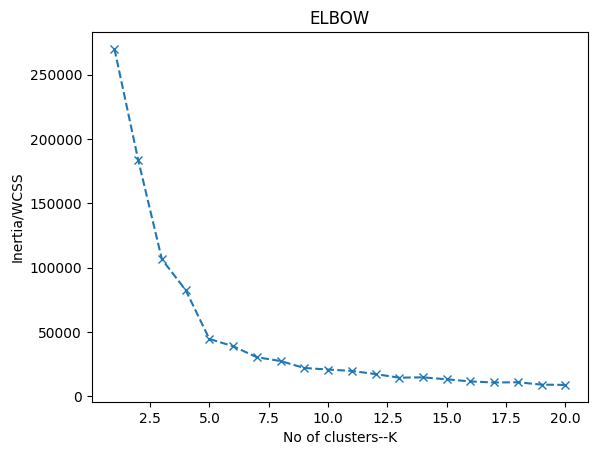

In [91]:
plt.plot(clusters,wcss,"x--")
plt.xlabel("No of clusters--K")
plt.ylabel("Inertia/WCSS")
plt.title("ELBOW")
plt.show()  # as k increases wcss decreases 

In [93]:
km2=KMeans(n_clusters=7)
km2.fit(data1) # after plotting wcss against different value at k it is observed  that elbow point occured at 7 ensuring better cluster results at 7

KMeans(n_clusters=7)

In [72]:
km2.cluster_centers_

array([[ 25.72727273,  79.36363636],
       [ 79.        ,  16.59259259],
       [108.18181818,  82.72727273],
       [ 54.88607595,  49.89873418],
       [ 26.30434783,  20.91304348],
       [ 78.03571429,  81.89285714],
       [109.7       ,  22.        ]])

In [73]:
cen2=km2.cluster_centers_

In [74]:
cen2

array([[ 25.72727273,  79.36363636],
       [ 79.        ,  16.59259259],
       [108.18181818,  82.72727273],
       [ 54.88607595,  49.89873418],
       [ 26.30434783,  20.91304348],
       [ 78.03571429,  81.89285714],
       [109.7       ,  22.        ]])

In [75]:
cen2data=pd.DataFrame(cen2,columns=["x","y",])

In [76]:
cen2data

,x,y
0,25.727273,79.363636
1,79.000000,16.592593
2,108.181818,82.727273
3,54.886076,49.898734
4,26.304348,20.913043
5,78.035714,81.892857
6,109.700000,22.000000


In [77]:
km2.labels_

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 3,
       4, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 1, 5, 1, 5, 1, 5, 1, 5,
       1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 3, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5,
       1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5,
       1, 5, 1, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2,
       6, 2])

In [78]:
data["labels"]=km2.labels_

In [79]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),labels
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,6
197,198,Male,32,126,74,2
198,199,Male,32,137,18,6


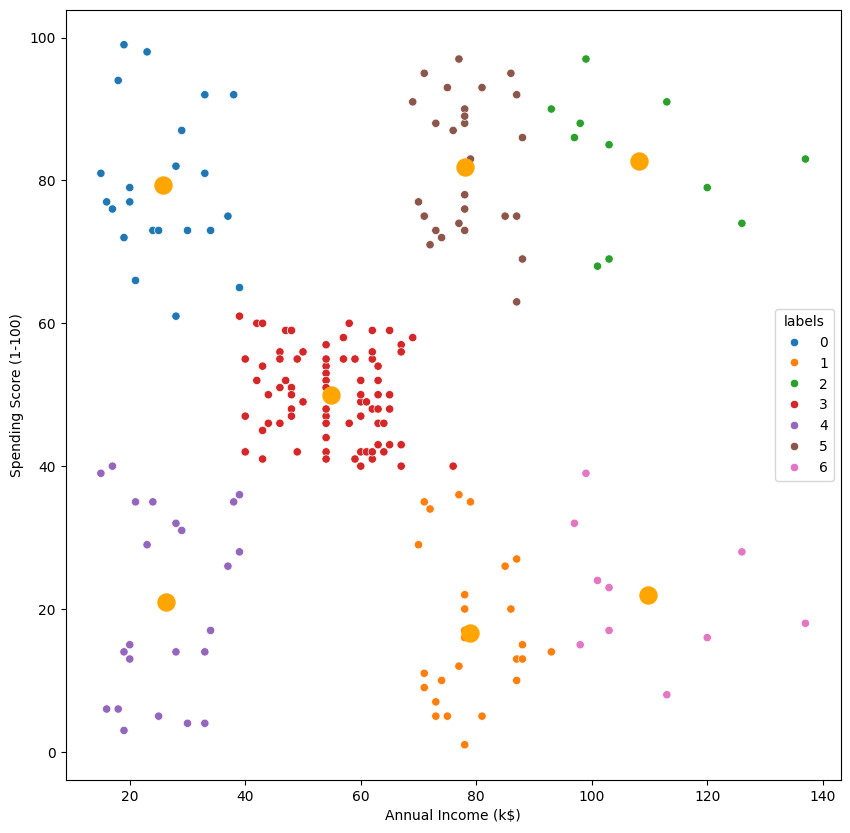

In [94]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=data,x=data1["Annual Income (k$)"],y=data1["Spending Score (1-100)"],hue="labels",palette="tab10")
plt.scatter(cen2data["x"],cen2data["y"],c="orange",s=150)
plt.show() #each cluster represent thier income and spending score 

In [95]:
income_summary = data.groupby('labels')['Annual Income (k$)'].agg(['mean', 'median', 'min', 'max', 'count'])
# to findout income range  based on clusters 

In [82]:
income_summary

,mean,median,min,max,count
labels,,,,,
0,25.727273,24.5,15,39,22
1,79.000000,78.0,70,93,27
2,108.181818,103.0,93,137,11
3,54.886076,54.0,39,76,79
4,26.304348,25.0,15,39,23
5,78.035714,78.0,69,88,28
6,109.700000,103.0,97,137,10


In [83]:
income_summary.rename(columns={
    'mean': 'Mean Income',
    'median': 'Median Income',
    'min': 'Min Income',
    'max': 'Max Income',
    'count': 'Number of Customers'
}, inplace=True)


In [84]:
print(income_summary)

        Mean Income  Median Income  Min Income  Max Income  \
labels                                                       
0         25.727273           24.5          15          39   
1         79.000000           78.0          70          93   
2        108.181818          103.0          93         137   
3         54.886076           54.0          39          76   
4         26.304348           25.0          15          39   
5         78.035714           78.0          69          88   
6        109.700000          103.0          97         137   

        Number of Customers  
labels                       
0                        22  
1                        27  
2                        11  
3                        79  
4                        23  
5                        28  
6                        10  


In [86]:
# so BY THESE ANALYSIS AND VISUALIZATION NOW WE CAN UNDERSTAND HOW INCOME IS DISTRIBUTED BASED ON CUSTOMER CLUSTERS AND NOW BASED ON THESE ANALYSIS 
# WE CAN CREATE GOOD MARKETTING  STRATEGIES FOR RETAIL STORE